Для начала, инициализируем выборку и выполним **пункт 1** - найдём максимальный и минимальный элементы выборки, а также размах выборки

In [ ]:
import numpy as np #импорт библиотек
import matplotlib.pyplot as plt
from scipy import stats

Размах - это разница между максимальный и минимальным элементами

In [ ]:
data = np.array([7, 8, 4, 0, 4, 6, 5, 4, 3, 2, 4, 8, 6, 2, 2,
        5, 3, 6, 6, 5, 5, 3, 5, 6, 7, 8, 9, 5, 2, 5,
        4, 5, 6, 6, 3, 6, 5, 3, 4, 5, 10, 3, 7, 5, 3,
        3, 3, 7, 5, 3, 4, 9, 2, 1, 4, 4, 4, 2, 4, 3,
        4, 4, 5, 5, 3, 7, 5, 3, 2, 6, 2, 4, 4, 4, 0,
        6, 1, 3, 4, 4, 5, 4, 8, 3, 5, 4, 11, 9, 9]) #инициализация выборки
data_max, data_min = max(data), min(data)
scope = data_max - data_min
print(f"Максимальный элемент: {data_max}\nМинимальный элемент: {data_min}\nРазмах: {scope}")

Максимальный элемент: 11
Минимальный элемент: 0
Размах: 11


**Пункт 2:** построение статистического ряда и полигона ряда

Для начала построим вариационный ряд - отсортированную исходную выборку

In [ ]:
statistic_row = sorted(data)
print("Вариационный ряд:")
for i in range (len(data)):
  print(int(statistic_row[i]), end=" ")

Вариационный ряд:
0 0 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 8 8 8 8 9 9 9 9 10 11 

Затем дискретный вариационный ряд - распределение значений и частот их появления в выборке

In [ ]:
freq = [0]*12 #массив частот
for i in range(len(data)):
  freq[data[i]] += 1
print("Значение | Частота")
for i in range (len(freq)):
  print("  ", i, "\t     ", freq[i])

Значение | Частота
   0 	      2
   1 	      2
   2 	      8
   3 	      15
   4 	      20
   5 	      17
   6 	      10
   7 	      5
   8 	      4
   9 	      4
   10 	      1
   11 	      1


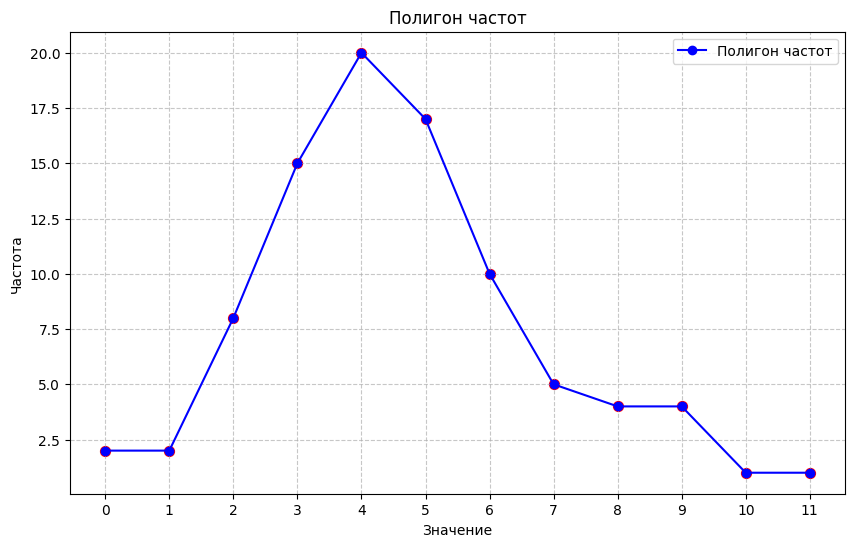

In [ ]:
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
frequencies = [2, 2, 8, 15, 20, 17, 10, 5, 4, 4, 1, 1]

plt.figure(figsize=(10, 6))

plt.plot(values, frequencies, marker='o', linestyle='-', color='b', label='Полигон частот')

plt.scatter(values, frequencies, color='red', s=50)

plt.title('Полигон частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(values)
plt.legend()

plt.show()

**Пункт 3:** построим эмпирическую функцию распределения с помощью найденных ранее частот

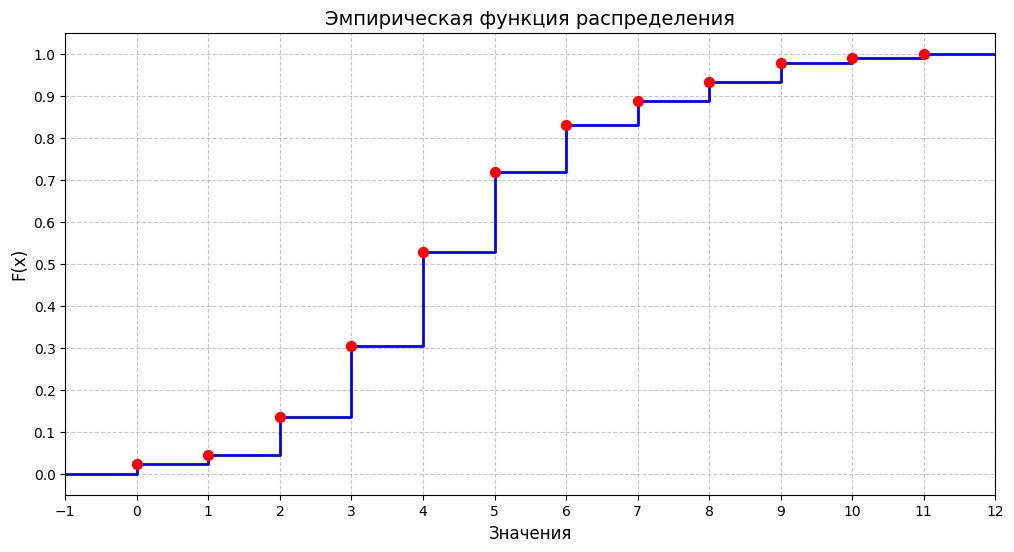

In [ ]:
n = len(data)  # Объем выборки
unique_values, counts = np.unique(data, return_counts=True)
x = np.sort(unique_values)
y = np.cumsum(counts) / n

x_efr = np.repeat(x, 2)
x_efr = np.insert(x_efr, 0, x[0]-1)
x_efr = np.append(x_efr, x[-1]+1)

y_efr = np.repeat(y, 2)
y_efr = np.insert(y_efr, 0, 0)
y_efr = np.append(y_efr, 1)

# Построение графика
plt.figure(figsize=(12, 6))
plt.step(x_efr, y_efr, where='post', color='b', linewidth=2, label='Эмпирическая функция распределения')

plt.title('Эмпирическая функция распределения', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(-1, 13))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(-1, 12)

plt.scatter(x, y, color='red', s=50, zorder=5, label='Точки скачков')

plt.show()

**Пункт 4:** нахождение основных характеристик выборки: моды, медианы, коэффициента ассиметрии и эксцесса

In [ ]:
# 1. Мода (наиболее часто встречающееся значение)
mode_result = stats.mode(data)
print(f"Мода: {mode_result.mode} (встречается {mode_result.count} раз(а))")

# 2. Медиана
median = np.median(data)
print(f"Медиана: {median}")

# 3. Коэффициент асимметрии (skewness)
skewness = stats.skew(data)
print(f"Коэффициент асимметрии: {skewness:.4f}")

# 4. Коэффициент эксцесса (kurtosis)
# Fisher's kurtosis (нормальное распределение имеет эксцесс 0)
kurtosis = stats.kurtosis(data, fisher=True)
print(f"Коэффициент эксцесса (по Фишеру): {kurtosis:.4f}")

# Pearson's kurtosis (нормальное распределение имеет эксцесс 3)
kurtosis_pearson = stats.kurtosis(data, fisher=False)
print(f"Коэффициент эксцесса (по Пирсону): {kurtosis_pearson:.4f}")

Мода: 4 (встречается 20 раз(а))
Медиана: 4.0
Коэффициент асимметрии: 0.5453
Коэффициент эксцесса (по Фишеру): 0.3462
Коэффициент эксцесса (по Пирсону): 3.3462


**Вывод о распределении исходной генеральной совокупности:**



*   Умеренная правосторонняя асимметрия (эксцесс не нулевой)
*   Слегка островершинная форма
*   Совпадение моды и медианы указывает на симметричность центральной части распределения.

Вывод: Распределение не является строго нормальным, но приближается к нормальному с некоторыми отклонениями (правосторонний хвост и избыточная куртотичность).

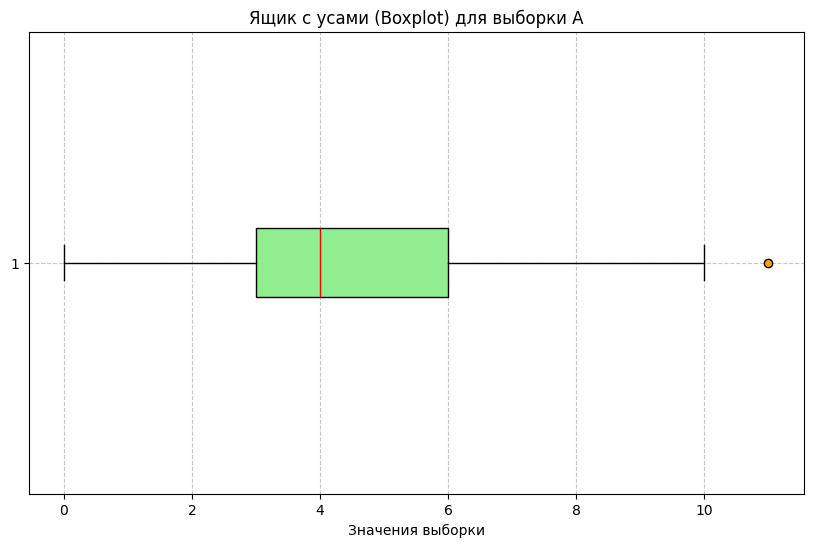

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные выборки A
data_A = np.array([
    7, 8, 4, 0, 4, 6, 5, 4, 3, 2, 4, 8, 6, 2, 2,
    5, 3, 6, 6, 5, 5, 3, 5, 6, 7, 8, 9, 5, 2, 5,
    4, 5, 6, 6, 3, 6, 5, 3, 4, 5, 10, 3, 7, 5, 3,
    3, 3, 7, 5, 3, 4, 9, 2, 1, 4, 4, 4, 2, 4, 3,
    4, 4, 5, 5, 3, 7, 5, 3, 2, 6, 2, 4, 4, 4, 0,
    6, 1, 3, 4, 4, 5, 4, 8, 3, 5, 4, 11, 9, 9
])

# Построение ящика с усами
plt.figure(figsize=(10, 6))
plt.boxplot(data_A, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='orange', marker='o'))

plt.title('Ящик с усами (Boxplot) для выборки A')
plt.xlabel('Значения выборки')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

